# Full Pipeline Test
This section tests the Full Pipeline - which runs on a single participant's data.

In [1]:
import cogrecon
from cogrecon.core.full_pipeline import full_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
from cogrecon.core.tools import generate_random_test_points

Original Misplacement: 0.390452838354
Original Swap: 0.3
Original Edge Resizing: 0.128049069062
Original Edge Distortion: 1.2
Axis Swap Pairs: [[0, 2], [2, 3], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 0.568864921804
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 0.509905650401
Raw Deanonymized Misplacement: 0.207846928834
Post-Deanonymized Misplacement: 0.207846928834
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.7897874485
Scaling: 1.05977598599
Translation Magnitude: 0.0860124702657
Translation: [-0.059820883950823189, -0.061802968250372237]
Geometric Distance Threshold: 0.509905650401
Post-Transform Misplacement: 0.188311121629
Number of Components: 2
Accurate Single-Item Placements: 1
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps

C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


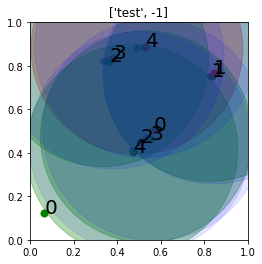

array([[0.39045283835375011, 0.3, 0.12804906906204036, 1.2,
        list([[0, 2], [2, 3], [3, 4]]), 4, 1, 0.568864921803793, 4, 1,
        0.50990565040092006, 0.20784692883391243, 0.20784692883391243,
        False, 1, 0.78978744850008498, 1.0597759859881997,
        0.086012470265737481,
        list([-0.059820883950823189, -0.061802968250372237]),
        0.50990565040092006, 0.18831112162861041, 2, 1, 0, 0, 0, 0, 1, 4,
        3, 1, 0.48698222634340183, nan, nan, nan, nan, nan, nan,
        0.32775710279185316, 0.46545692493541496,
        list([[0, 2, 3, 4], [1]]), False, None]], dtype=object)

In [2]:
# Test with random first
a, b = generate_random_test_points()
data = ParticipantData([TrialData(a, b)])
config = AnalysisConfiguration(debug_labels=['test', -1])
full_pipeline(data, config, visualize=True, visualization_extent=[[0., 1.], [0., 1.]])

Original Misplacement: 278.668470039
Original Swap: 0.2
Original Edge Resizing: 169.654385047
Original Edge Distortion: 0.5
Axis Swap Pairs: [[0, 3], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 447.527409909
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 138.788822535
Raw Deanonymized Misplacement: 109.451224836
Post-Deanonymized Misplacement: 109.451224836
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.10690961699
Translation Magnitude: 16.1228213086
Translation: [-15.428210492688692, -4.6814194366052249]
Geometric Distance Threshold: 138.788822535
Post-Transform Misplacement: 103.922916243
Number of Components: 3
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate M

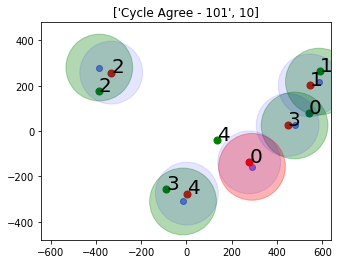

Original Misplacement: 265.708768598
Original Swap: 0.2
Original Edge Resizing: 158.398818982
Original Edge Distortion: 0.6
Axis Swap Pairs: [[0, 4], [2, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 469.207839807
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 109.716622856
Raw Deanonymized Misplacement: 76.6569976697
Post-Deanonymized Misplacement: 76.6569976697
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.809787403892
Scaling: 1.08005785096
Translation Magnitude: 49.0915149533
Translation: [-36.430181025756113, 32.906211432454171]
Geometric Distance Threshold: 109.716622856
Post-Transform Misplacement: 61.7260607939
Number of Components: 3
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3


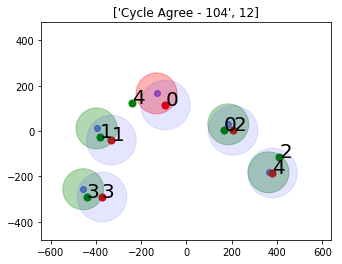

Original Misplacement: 307.176282438
Original Swap: 0.2
Original Edge Resizing: 161.884543562
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 4], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 479.686418163
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 131.122752359
Raw Deanonymized Misplacement: 107.512018687
Post-Deanonymized Misplacement: 107.512018687
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.11628690648
Translation Magnitude: 70.4317048817
Translation: [-15.493739944024544, 68.706397628479891]
Geometric Distance Threshold: 131.122752359
Post-Transform Misplacement: 71.6510449368
Number of Components: 3
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Mi

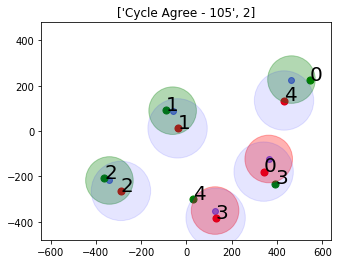

Original Misplacement: 258.194873269
Original Swap: 0.2
Original Edge Resizing: 153.137740869
Original Edge Distortion: 0.7
Axis Swap Pairs: [[1, 3], [2, 3]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 491.255616602
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 266.844868832
Raw Deanonymized Misplacement: 177.275175291
Post-Deanonymized Misplacement: 177.275175291
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 0.853408596527
Translation Magnitude: 146.034385802
Translation: [-102.34843294384696, 104.16736586124367]
Geometric Distance Threshold: 266.844868832
Post-Transform Misplacement: 111.171229982
Number of Components: 3
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate M

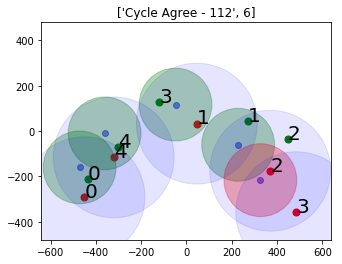

Original Misplacement: 323.193831967
Original Swap: 0.1
Original Edge Resizing: 146.090858723
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 1]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 596.522907944
Deanonymized Accurate Placements: 3
Deanonymized Inaccurate Placements: 2
Deanonymized Accuracy Threshold: 256.617030762
Raw Deanonymized Misplacement: 158.652995718
Post-Deanonymized Misplacement: 158.652995718
Transformation Auto-Exclusion: True
Number of Points Excluded From Geometric Transform: 2
Rotation Theta: nan
Scaling: nan
Translation Magnitude: nan
Translation: [nan, nan]
Geometric Distance Threshold: 256.617030762
Post-Transform Misplacement: 158.652995718
Number of Components: 3
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 1
Misassignment: 3
Accurate Misassignment: 1
Inaccurate Misassignment: 2
Swap Distance Thr

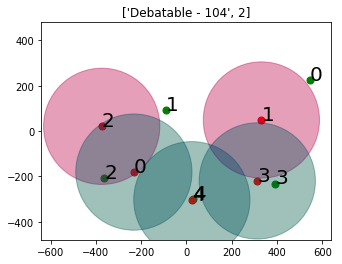

Original Misplacement: 210.604582994
Original Swap: 0.0
Original Edge Resizing: 130.868700578
Original Edge Distortion: 0.3
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 268.919834385
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 208.176916735
Raw Deanonymized Misplacement: 149.366871713
Post-Deanonymized Misplacement: 149.366871713
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.819467233785
Scaling: 1.2625896005
Translation Magnitude: 131.733258766
Translation: [-3.546564588140086, 131.68550924399963]
Geometric Distance Threshold: 208.176916735
Post-Transform Misplacement: 91.081101275
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassig

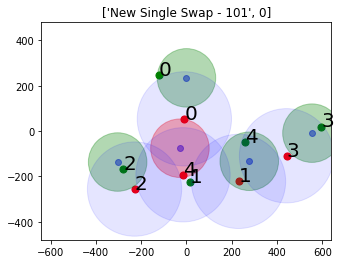

Original Misplacement: 131.922805484
Original Swap: 0.0
Original Edge Resizing: 70.9961866629
Original Edge Distortion: 0.3
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 204.955747787
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 219.675051813
Raw Deanonymized Misplacement: 119.957108547
Post-Deanonymized Misplacement: 119.957108547
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.801737473859
Scaling: 0.987995826748
Translation Magnitude: 62.3175016062
Translation: [-55.84484267905043, -27.655461532730715]
Geometric Distance Threshold: 219.675051813
Post-Transform Misplacement: 100.359293887
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misa

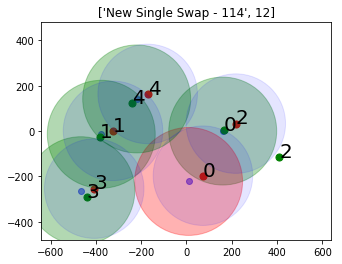

Original Misplacement: 191.51938773
Original Swap: 0.0
Original Edge Resizing: 149.553700367
Original Edge Distortion: 0.2
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 302.875418149
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 129.610800145
Raw Deanonymized Misplacement: 101.107905421
Post-Deanonymized Misplacement: 101.107905421
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.09195451238
Translation Magnitude: 62.8978847687
Translation: [36.617864820673105, -51.139768129628663]
Geometric Distance Threshold: 129.610800145
Post-Transform Misplacement: 76.0033725561
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 1


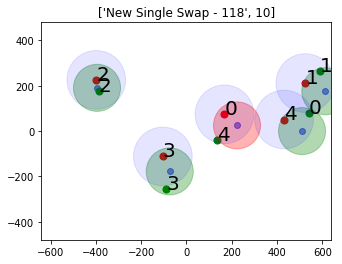

Original Misplacement: 153.388496034
Original Swap: 0.0
Original Edge Resizing: 63.0698297612
Original Edge Distortion: 0.2
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 210.522205459
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 269.47916741
Raw Deanonymized Misplacement: 149.571003011
Post-Deanonymized Misplacement: 149.571003011
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.835686554502
Scaling: 0.980997591399
Translation Magnitude: 57.1792898862
Translation: [33.450571734751719, 46.373812033363706]
Geometric Distance Threshold: 269.47916741
Post-Transform Misplacement: 142.359924851
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassi

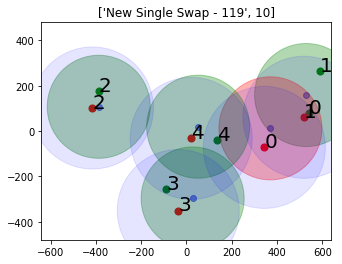

Original Misplacement: 187.019455934
Original Swap: 0.0
Original Edge Resizing: 77.1123999378
Original Edge Distortion: 0.2
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 301.436201797
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 155.429008192
Raw Deanonymized Misplacement: 84.6843720867
Post-Deanonymized Misplacement: 84.6843720867
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.0297275352
Translation Magnitude: 16.3452521515
Translation: [-5.8292566935185874, 15.2704628056443]
Geometric Distance Threshold: 155.429008192
Post-Transform Misplacement: 84.3822778571
Number of Components: 4
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 1
True Swaps: 1
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate Misassignment: 2
In

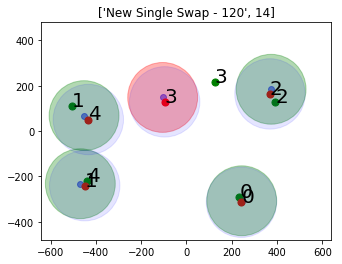

Original Misplacement: 381.974594166
Original Swap: 0.4
Original Edge Resizing: 96.0354770998
Original Edge Distortion: 1.1
Axis Swap Pairs: [[1, 2], [1, 4], [2, 3], [2, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 720.746076034
Deanonymized Accurate Placements: 3
Deanonymized Inaccurate Placements: 2
Deanonymized Accuracy Threshold: 122.021215812
Raw Deanonymized Misplacement: 94.5250412572
Post-Deanonymized Misplacement: 94.5250412572
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 2
Rotation Theta: nan
Scaling: 0.980125818997
Translation Magnitude: 57.8402273592
Translation: [57.078169560989579, -9.3581227036304639]
Geometric Distance Threshold: 122.021215812
Post-Transform Misplacement: 62.3811864995
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignme

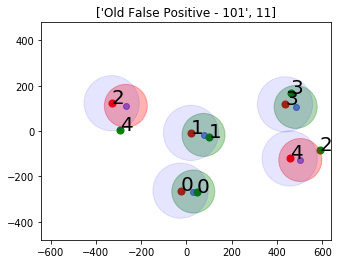

Original Misplacement: 412.256489376
Original Swap: 0.2
Original Edge Resizing: 135.620218882
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 2], [2, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 708.112872864
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 300.527946948
Raw Deanonymized Misplacement: 177.218082134
Post-Deanonymized Misplacement: 177.218082134
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.839986739799
Scaling: 1.05090131684
Translation Magnitude: 100.909077231
Translation: [100.29881196355998, 11.081073341743263]
Geometric Distance Threshold: 300.527946948
Post-Transform Misplacement: 166.744532612
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
A

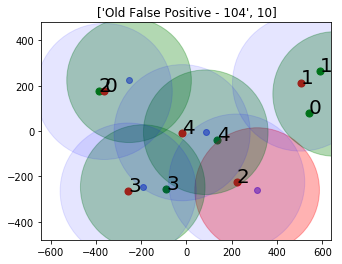

Original Misplacement: 304.163755216
Original Swap: 0.3
Original Edge Resizing: 132.560785313
Original Edge Distortion: 0.9
Axis Swap Pairs: [[0, 3], [0, 4], [3, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 573.775145741
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 180.454219184
Raw Deanonymized Misplacement: 111.470839105
Post-Deanonymized Misplacement: 111.470839105
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: 0.826786603092
Scaling: 1.13864000343
Translation Magnitude: 66.3604730612
Translation: [60.863743183560871, 26.444605321213373]
Geometric Distance Threshold: 180.454219184
Post-Transform Misplacement: 88.7196253925
Number of Components: 4
Accurate Single-Item Placements: 3
Inaccurate Single-Item Placements: 0
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignm

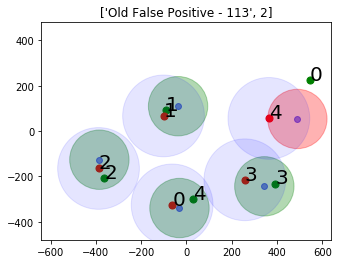

Original Misplacement: 303.120934861
Original Swap: 0.3
Original Edge Resizing: 146.298771575
Original Edge Distortion: 0.7
Axis Swap Pairs: [[0, 2], [0, 4], [2, 4]]
Pre-Processed Accurate Placements: 3
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 553.746463416
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 85.4604844607
Raw Deanonymized Misplacement: 65.0927062313
Post-Deanonymized Misplacement: 65.0927062313
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: 1.06413601192
Translation Magnitude: 15.0065240938
Translation: [-9.6117492309764145, -11.52432393242951]
Geometric Distance Threshold: 85.4604844607
Post-Transform Misplacement: 57.7671015084
Number of Components: 4
Accurate Single-Item Placements: 2
Inaccurate Single-Item Placements: 1
True Swaps: 1
Partial Swaps: 0
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Acc

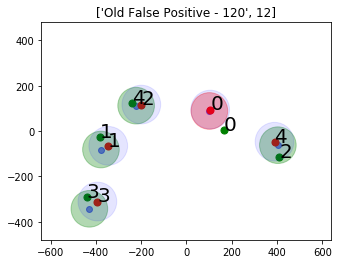

In [4]:
# Now test with data
actual_coordinates_filepath = r"Z:\Kevin\iPosition\Hillary\MRE\actual_coordinates.txt"
filepath_template = r"Z:\Kevin\iPosition\Hillary\MRE\{0}\{0}position_data_coordinates.txt"
participant_ids = ['101', '104', '105', '112', '104', '101', '114', '118', '119', '120', '101', '104', '113', '120']
labels = ['Cycle Agree - 101', 'Cycle Agree - 104', 'Cycle Agree - 105', 'Cycle Agree - 112',
          'Debatable - 104',
          'New Single Swap - 101', 'New Single Swap - 114',
          'New Single Swap - 118', 'New Single Swap - 119', 'New Single Swap - 120',
          'Old False Positive - 101', 'Old False Positive - 104',
          'Old False Positive - 113', 'Old False Positive - 120']
trial_nums = [10, 12, 2, 6, 2, 0, 12, 10, 10, 14, 11, 10, 2, 12]

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid), (15, 5, 2))
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    full_pipeline(data, config, visualize=True, visualization_extent=[[-640., 640.], [-480., 480.]])

Original Misplacement: 19.0994271825
Original Swap: 0.0
Original Edge Resizing: 7.45236584801
Original Edge Distortion: 0.8
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 25.1603532372
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 17.3475775308
Raw Deanonymized Misplacement: 12.347475087
Post-Deanonymized Misplacement: 12.347475087
Transformation Auto-Exclusion: True
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: nan
Translation Magnitude: nan
Translation: [nan, nan]
Geometric Distance Threshold: 17.3475775308
Post-Transform Misplacement: 12.347475087
Number of Components: 3
Accurate Single-Item Placements: 1
Inaccurate Single-Item Placements: 1
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 1
Partial Cycle Swaps: 0
Misassignment: 3
Accurate Misassignment: 3
Inaccurate Misassignment: 0
Swap Distance Threshold: 1

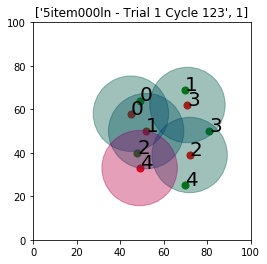

Original Misplacement: 27.2682005319
Original Swap: 0.3
Original Edge Resizing: 12.180742615
Original Edge Distortion: 0.9
Axis Swap Pairs: [[0, 4], [1, 4], [2, 4]]
Pre-Processed Accurate Placements: 4
Pre-Processed Inaccurate Placements: 1
Pre-Processed Accuracy Threshold: 35.5950980697
Deanonymized Accurate Placements: 4
Deanonymized Inaccurate Placements: 1
Deanonymized Accuracy Threshold: 18.6035188375
Raw Deanonymized Misplacement: 13.9125690043
Post-Deanonymized Misplacement: 13.9125690043
Transformation Auto-Exclusion: True
Number of Points Excluded From Geometric Transform: 1
Rotation Theta: nan
Scaling: nan
Translation Magnitude: nan
Translation: [nan, nan]
Geometric Distance Threshold: 18.6035188375
Post-Transform Misplacement: 13.9125690043
Number of Components: 2
Accurate Single-Item Placements: 0
Inaccurate Single-Item Placements: 1
True Swaps: 0
Partial Swaps: 0
Cycle Swaps: 1
Partial Cycle Swaps: 0
Misassignment: 4
Accurate Misassignment: 4
Inaccurate Misassignment: 0
Sw

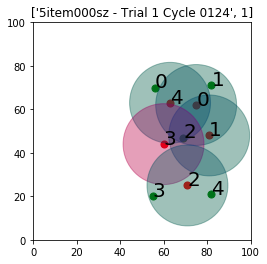

In [19]:
from cogrecon.core.file_io import get_coordinates_from_file

# Now test with data
actual_coordinates_filepath = r"Z:\Kevin\iPosition\Pat\data\{0}actual_coordinates.txt"
filepath_template = r"Z:\Kevin\iPosition\Pat\data\{0}position_data_coordinates.txt"
participant_ids = ['5item000ln', '5item000sz']
labels = ['5item000ln - Trial 1 Cycle 123', '5item000sz - Trial 1 Cycle 0124']
trial_nums = [1, 1]

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    actual = get_coordinates_from_file(actual_coordinates_filepath.format(pid), None, dimension=2)
    dat = get_coordinates_from_file(filepath_template.format(pid), None,dimension=2)
    # data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid))\
    data = ParticipantData([TrialData(a, d) for a, d in zip(actual, dat)])
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    full_pipeline(data, config, visualize=True, visualization_extent=[[0., 100.], [0., 100.]])

Original Misplacement: 3.64669208527
Original Swap: 0.0444444444444
Original Edge Resizing: 4.46475160772
Original Edge Distortion: 0.0444444444444
Axis Swap Pairs: [[2, 3], [6, 7]]
Pre-Processed Accurate Placements: 8
Pre-Processed Inaccurate Placements: 2
Pre-Processed Accuracy Threshold: 5.66375695913
Deanonymized Accurate Placements: 7
Deanonymized Inaccurate Placements: 3
Deanonymized Accuracy Threshold: 2.58160199393
Raw Deanonymized Misplacement: 1.83411273957
Post-Deanonymized Misplacement: 1.83411273957
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 3
Rotation Theta: 0.0
Scaling: 1.02359808636
Translation Magnitude: 0.138875456777
Translation: [-0.13887545677707891]
Geometric Distance Threshold: 2.58160199393
Post-Transform Misplacement: 1.73119898169
Number of Components: 8
Accurate Single-Item Placements: 4
Inaccurate Single-Item Placements: 2
True Swaps: 1
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 4
Accur

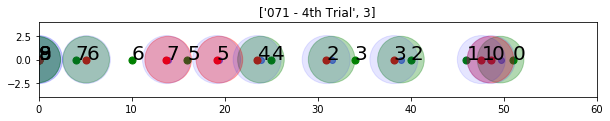

Original Misplacement: 3.56013435847
Original Swap: 0.0
Original Edge Resizing: 2.51205012114
Original Edge Distortion: 0.155555555556
Axis Swap Pairs: []
Pre-Processed Accurate Placements: 6
Pre-Processed Inaccurate Placements: 4
Pre-Processed Accuracy Threshold: 4.66603193304
Deanonymized Accurate Placements: 8
Deanonymized Inaccurate Placements: 2
Deanonymized Accuracy Threshold: 5.19973929893
Raw Deanonymized Misplacement: 3.53844955462
Post-Deanonymized Misplacement: 3.53844955462
Transformation Auto-Exclusion: False
Number of Points Excluded From Geometric Transform: 2
Rotation Theta: nan
Scaling: 1.02992585607
Translation Magnitude: 0.285399679163
Translation: [-0.28339987207785439, 0.033726686358119817]
Geometric Distance Threshold: 5.19973929893
Post-Transform Misplacement: 3.47293159242
Number of Components: 9
Accurate Single-Item Placements: 7
Inaccurate Single-Item Placements: 1
True Swaps: 0
Partial Swaps: 1
Cycle Swaps: 0
Partial Cycle Swaps: 0
Misassignment: 2
Accurate M

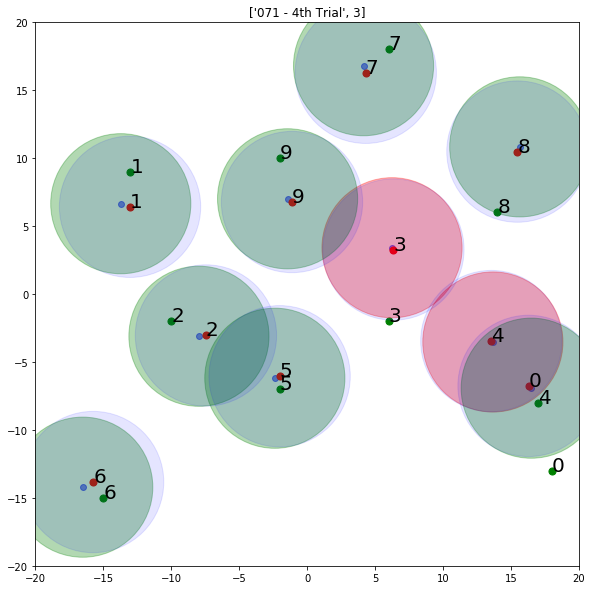

In [16]:
from cogrecon.core.data_flexing.dimension_removal import remove_dimensions

actual_coordinates_filepath = r"C:\Users\admin\Documents\GitHub\msl-iposition-pipeline\saved_data\iPositionConversion\071actual_coordinates.txt"
filepath_template = r"C:\Users\admin\Documents\GitHub\msl-iposition-pipeline\saved_data\iPositionConversion\{0}position_data_coordinates.txt"
participant_ids = ['071']
trial_nums = [3]
labels = ['071 - 4th Trial']

for pid, label, trial_n in zip(participant_ids, labels, trial_nums):
    data = ParticipantData.load_from_file(actual_coordinates_filepath, filepath_template.format(pid), (4, 10, 3))
    data.trials = [data.trials[trial_n]]
    config = AnalysisConfiguration(debug_labels=[label, trial_n])
    time_data = remove_dimensions(data, removal_dim_indices=[0, 1])
    space_data = remove_dimensions(data, removal_dim_indices=[2])
    full_pipeline(time_data, config, visualize=True, visualization_extent=[[0., 60.], [-4., 4.]], fig_size=(10, 2))
    full_pipeline(space_data, config, visualize=True, visualization_extent=[[-20., 20.], [-20., 20.]], fig_size=(10, 10))

# Batch Pipeline Test
This section tests the Batch Pipeline, which runs on a folder full of data files, automatically finding the appropriate files.

In [8]:
import cogrecon
from cogrecon.core.batch_pipeline import batch_pipeline
from cogrecon.core.data_structures import TrialData, ParticipantData, AnalysisConfiguration
import os, datetime
import easygui

In [11]:
selected_directory = easygui.diropenbox()

if selected_directory is not None:
    print(selected_directory)
    print(type(selected_directory))
    if os.path.exists(selected_directory):
        batch_pipeline(str(selected_directory), datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv"))
    elif selected_directory is not '':
        logging.error('Directory not found.')

In [12]:
batch_pipeline("Z:\\Kevin\\iPosition\\Hillary\\MRE",
               datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.csv"),
               data_shape=(15, 5, 2))

C:\Users\admin\AppData\Local\conda\conda\envs\iposition\lib\site-packages\cogrecon\core\batch_pipeline.py:356: RuntimeWarning: Mean of empty slice
  result.append(agg_functions[iidx]([row[iidx] for row in results]))
